In [49]:
import pandas as pd
import os
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import metrics
from sklearn import discriminant_analysis
import seaborn as sns


# Task 1: Binary classification.

Explore the data to generate summary statistics and plots that help the reader understand
the data, with a focus on information relevant to the classification task.

In [4]:
os.getcwd()

'/Users/elenalarrauri/LSE/COURSES/AT/Statistical_learning/FINAL_PROJECT_11DEC'

Load the data, check for missing variables.

In [5]:
df = pd.read_csv("data1.csv.gz")

In [6]:
df

,label,DPM1,NIPAL3,KRIT1,LAP3,CD99,MAD1L1,LASP1,M6PR,CFLAR,...,CISD3,DDX52,GGNBP2,C11orf98,MRPL45,TRG.AS1,EBLN3P,TRBV7.2,AC010642.2,POLR2J3.1
0,TREG,0.000000,0.0,0.000000,0.00000,4.459588,0.000000,4.175754,3.107406,3.107406,...,0.000000,0.000000,0.000000,3.777941,0.000000,0.000000,0.000000,0.000000,3.107406,0.000000
1,TREG,0.000000,0.0,0.000000,0.00000,3.159469,3.159469,0.000000,0.000000,3.159469,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.484917,0.000000,0.000000
2,CD4+T,3.568377,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.568377,0.000000,0.000000,0.000000,0.000000
3,CD4+T,2.574454,0.0,0.000000,0.00000,3.228759,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.574454,0.000000,0.000000,2.574454,0.000000,2.574454,0.000000,0.000000,2.574454
4,CD4+T,0.000000,0.0,0.000000,0.00000,0.000000,3.418392,0.000000,0.000000,0.000000,...,2.757484,0.000000,3.418392,0.000000,0.000000,2.757484,3.418392,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5466,CD4+T,2.786860,0.0,0.000000,2.78686,2.786860,2.786860,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.448715,0.000000,0.000000,0.000000
5467,TREG,0.000000,0.0,2.804178,0.00000,3.861582,0.000000,0.000000,0.000000,2.804178,...,0.000000,0.000000,3.466579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.804178
5468,TREG,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,2.953102,2.953102,...,0.000000,0.000000,0.000000,0.000000,2.953102,0.000000,0.000000,0.000000,0.000000,3.619814
5469,CD4+T,0.000000,0.0,0.000000,0.00000,4.067406,3.391236,3.391236,3.391236,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.391236,0.000000,0.000000,0.000000


In [7]:
# No missing values
sum(df.isna().sum())

0

Balanced problem? 

In [8]:
# Not fully balanced class.

df["label"].value_counts()

label
CD4+T    3356
TREG     2115
Name: count, dtype: int64

What type of regressors do we have, numerical, categorical/binary?
All numerical according.

In [9]:
df.dtypes

label          object
DPM1          float64
NIPAL3        float64
KRIT1         float64
LAP3          float64
               ...   
TRG.AS1       float64
EBLN3P        float64
TRBV7.2       float64
AC010642.2    float64
POLR2J3.1     float64
Length: 4124, dtype: object

Sparsity?

Difference in values of X for different lables.

In [50]:
def test(model,X):
    model.fit_transform(X)
    return model

In [54]:
pca = decomposition.PCA(n_components=10)

In [55]:
test(pca)

PCA(n_components=10)

### Visual analysis is tough given so many variables, let's use PCA.

In [ ]:

# Separate x and y

regressors = df.columns.to_list()
regressors.remove("label")
regressors[0:5] #All regressors, label removed.

#Scaling is supposed to be important for PCA.

X = df[regressors]

scaler = preprocessing.StandardScaler()
scaler.fit(X)

X_standardized = scaler.transform(X)
X_standardized


#This is PCA
pca = decomposition.PCA(n_components=10)
pca_10_component = pca.fit_transform(X_standardized)

df_pca_10 = pd.DataFrame(pca_10_component)

#Concatenate labels to columns 
df_pca_10 = pd.concat([df['label'],df_pca_10],axis=1)

In [34]:
df_pca_10

,label,0,1,2,3,4,5,6,7,8,9
0,TREG,7.845086,-2.578691,-2.989150,14.288098,-7.667303,-14.885905,-2.293077,-3.624796,1.184032,-3.189286
1,TREG,0.166344,2.431817,-4.463784,15.803165,-3.173360,-7.059681,1.986412,6.311388,-2.374139,-0.759694
2,CD4+T,-15.443612,-10.449296,-5.617058,-2.349268,1.024723,2.216078,2.139197,-3.191880,4.005639,3.555937
3,CD4+T,0.987188,2.338324,8.525638,-8.412272,4.733824,1.111520,5.582885,1.247035,-0.003083,0.494619
4,CD4+T,0.749301,1.114879,6.038010,-5.695601,4.005998,-1.287128,0.982523,4.592015,1.247803,3.488538
...,...,...,...,...,...,...,...,...,...,...,...
5466,CD4+T,-1.241863,0.303626,9.758051,-3.136028,0.787658,1.017255,0.252404,3.974983,1.810587,-3.712157
5467,TREG,1.665901,-2.372652,6.225637,10.086477,7.344901,-6.331891,0.120691,-0.517850,4.460276,1.404945
5468,TREG,-2.878057,0.032985,4.010916,-1.562722,6.833399,-6.079894,-3.047054,2.858744,-2.301460,4.137536
5469,CD4+T,-4.037221,9.331288,4.513325,-3.508397,-10.667362,-0.351524,-4.007525,-3.967429,0.910844,0.699411


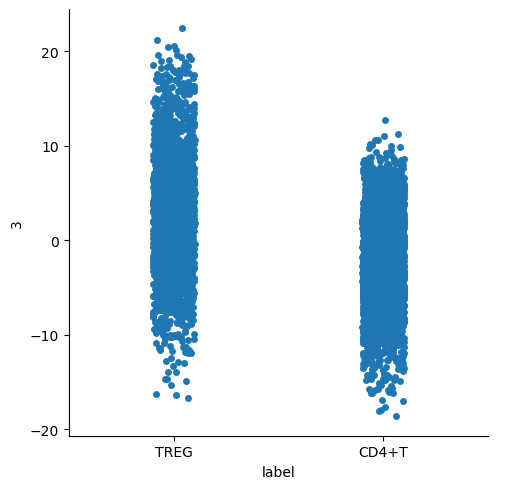

In [39]:
sns.catplot(data=df_pca_10, x="label", y=3)





Can plot it more, like this

In [42]:
y_pred = [1,1,0,0]
y_true = [0,1,1,0]

In [43]:
metrics.accuracy_score(y_true,y_pred)

0.5

In [ ]:
metrics.balanced_accuracy_score

In [44]:
def eval_metrics(y_true_test_array, y_pred_test_array):
    """
    Returns dictionary with different evaluation metrics and their corresponing values
    
    """
    metrics = {}

    metrics["accuracy"] = metrics.accuracy_score(y_true_test_array,y_pred_test_array)
    metrics["balanced_accuracy"] = metrics.balanced_accuracy_score(y_true_test_array,y_pred_test_array)
    metrics["F1_score"] = metrics.f1_score(y_true_test_array,y_pred_test_array)
    metrics["confusion_m"] = metrics.confusion_matrix(y_true_test_array,y_pred_test_array)

    return metrics


    

# T1.2 Train and evaluate the following classifiers (covered in the course):
• Linear Discriminant Analysis (LDA)
• Logistic classifier
• Quadratic Discriminant Analysis (QDA)
• Nearest Neighbor Classifier (k-NN)
• Gradient Boosting Decision Trees (GBDT)
• Random Forest
• Support Vector Machine (SVM).
- Additionally, train and evaluate these classifiers using PCA with 10 components.

## Start with Random Forest, good baseline and little preprocessing to do.

In [45]:
df['label'] = df['label'].apply(lambda row: 1 if row=="TREG" else 0)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

,label,DPM1,NIPAL3,KRIT1,LAP3,CD99,MAD1L1,LASP1,M6PR,CFLAR,...,CISD3,DDX52,GGNBP2,C11orf98,MRPL45,TRG.AS1,EBLN3P,TRBV7.2,AC010642.2,POLR2J3.1
0,1,0.000000,0.0,0.000000,0.00000,4.459588,0.000000,4.175754,3.107406,3.107406,...,0.000000,0.000000,0.000000,3.777941,0.000000,0.000000,0.000000,0.000000,3.107406,0.000000
1,1,0.000000,0.0,0.000000,0.00000,3.159469,3.159469,0.000000,0.000000,3.159469,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.484917,0.000000,0.000000
2,0,3.568377,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.568377,0.000000,0.000000,0.000000,0.000000
3,0,2.574454,0.0,0.000000,0.00000,3.228759,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.574454,0.000000,0.000000,2.574454,0.000000,2.574454,0.000000,0.000000,2.574454
4,0,0.000000,0.0,0.000000,0.00000,0.000000,3.418392,0.000000,0.000000,0.000000,...,2.757484,0.000000,3.418392,0.000000,0.000000,2.757484,3.418392,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5466,0,2.786860,0.0,0.000000,2.78686,2.786860,2.786860,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.448715,0.000000,0.000000,0.000000
5467,1,0.000000,0.0,2.804178,0.00000,3.861582,0.000000,0.000000,0.000000,2.804178,...,0.000000,0.000000,3.466579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.804178
5468,1,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,2.953102,2.953102,...,0.000000,0.000000,0.000000,0.000000,2.953102,0.000000,0.000000,0.000000,0.000000,3.619814
5469,0,0.000000,0.0,0.000000,0.00000,4.067406,3.391236,3.391236,3.391236,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.391236,0.000000,0.000000,0.000000
